In [42]:
import pandas as pd
df = pd.read_csv('cars_nullhandled.csv')
df.reset_index(inplace=True)
df.head()

,index,Unnamed: 0,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,0,0,1,maruti swift,2015,petrol,8063,386399,noida,18715,...,2,397677,404177.000000,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,1,1,2,maruti alto 800,2016,petrol,23104,265499,noida,2676,...,1,272935,354313.000000,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,2,2,3,hyundai grand i10,2017,petrol,23402,477699,noida,609,...,1,469605,550750.603916,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,3,3,4,maruti swift,2013,diesel,39124,307999,noida,6511,...,1,294262,374326.000000,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,4,4,5,hyundai grand i10,2015,petrol,22116,361499,noida,3225,...,1,360716,367216.000000,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


In [43]:
df.info()
bool_columns = list(df.select_dtypes(include='bool'))
bool_columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6399 entries, 0 to 6398
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                6399 non-null   int64  
 1   Unnamed: 0           6399 non-null   int64  
 2   id                   6399 non-null   int64  
 3   car_name             6399 non-null   object 
 4   yr_mfr               6399 non-null   int64  
 5   fuel_type            6399 non-null   object 
 6   kms_run              6399 non-null   int64  
 7   sale_price           6399 non-null   int64  
 8   city                 6399 non-null   object 
 9   times_viewed         6399 non-null   int64  
 10  body_type            6399 non-null   object 
 11  transmission         6399 non-null   object 
 12  variant              6399 non-null   object 
 13  assured_buy          6399 non-null   bool   
 14  registered_city      6391 non-null   object 
 15  registered_state     6391 non-null   o

['assured_buy', 'is_hot', 'reserved', 'warranty_avail']

In [44]:
df['assured_buy'] = df['assured_buy'].astype(int)
df['is_hot'] = df['is_hot'].astype(int)
df['reserved'] = df['reserved'].astype(int)
df['warranty_avail'] = df['warranty_avail'].astype(int)
bool_columns = list(df.select_dtypes(include='bool'))
bool_columns

[]

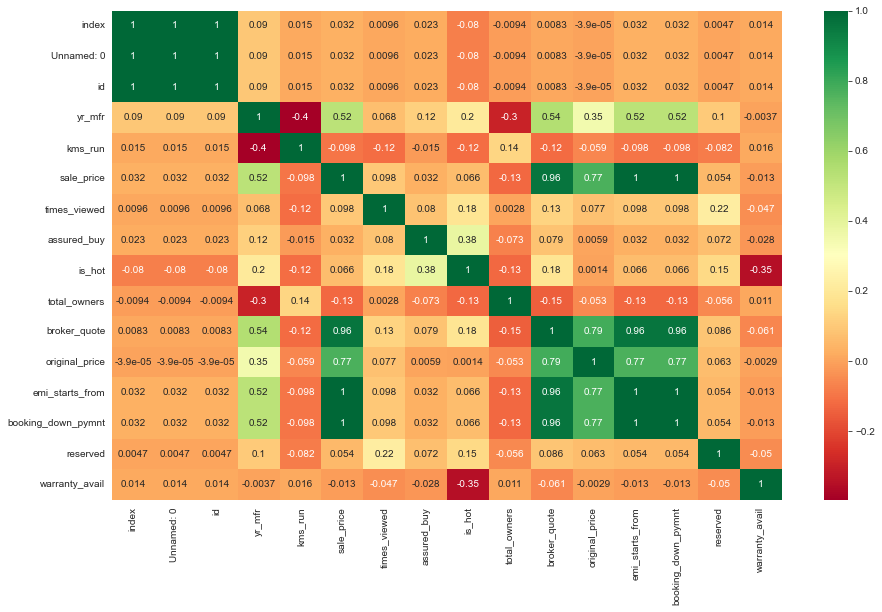

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
dataplot = sns.heatmap(df.corr(), cmap="RdYlGn", annot=True)
plt.show()

From above heatmap, ['yr_mfr','broker_qoute','original_price','emi_starts_from','booking_down_pymnt'] have strong correlation with target variable...whereas ['times_viewed','fitness_certificate] have low correlation but can be considered in X.

In [46]:
obj_columns = list(df.select_dtypes(include='object'))
obj_columns

['car_name',
 'fuel_type',
 'city',
 'body_type',
 'transmission',
 'variant',
 'registered_city',
 'registered_state',
 'rto',
 'source',
 'make',
 'model',
 'car_availability',
 'car_rating',
 'ad_created_on',
 'fitness_certificate']

Target Encoding Performed

In [47]:
from category_encoders import TargetEncoder
Targetenc = TargetEncoder()
# transforming the column after fitting
for obj in obj_columns:
    df[obj]= Targetenc.fit_transform(df[obj],y= df['sale_price'])
df.head(10)

/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/opt/anaconda3/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,index,Unnamed: 0,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,0,0,1,414144.433054,2015,391306.642339,8063,386399,427978.646209,18715,...,2,397677,404177.000000,482520.830549,454604.92702,460437.771821,8975,57960,0,0
1,1,1,2,270119.030769,2016,391306.642339,23104,265499,427978.646209,2676,...,1,272935,354313.000000,482520.830549,454604.92702,460437.771821,6167,39825,0,0
2,2,2,3,432492.138211,2017,391306.642339,23402,477699,427978.646209,609,...,1,469605,550750.603916,482520.830549,454604.92702,460437.771821,11096,71655,0,0
3,3,3,4,414144.433054,2013,611056.708208,39124,307999,427978.646209,6511,...,1,294262,374326.000000,482520.830549,454604.92702,460437.771821,7154,46200,0,0
4,4,4,5,432492.138211,2015,391306.642339,22116,361499,427978.646209,3225,...,1,360716,367216.000000,482520.830549,454604.92702,460437.771821,8397,54225,0,0
5,5,5,6,271602.879227,2018,391306.642339,23534,335299,427978.646209,1055,...,1,343212,439056.000000,482520.830549,454604.92702,460437.771821,7788,50295,0,0
6,6,6,7,285020.508929,2012,611056.708208,41213,281999,427978.646209,909,...,1,201200,550750.603916,482520.830549,454604.92702,460437.771821,6550,42300,0,0
7,7,7,8,322510.091703,2012,391306.642339,38328,321499,427978.646209,2760,...,3,319200,410764.000000,482520.830549,454604.92702,460437.771821,7468,48225,0,0
8,8,8,9,565667.444444,2014,611056.708208,56402,456199,427978.646209,2475,...,1,452023,566123.000000,482520.830549,454604.92702,460437.771821,10596,68430,0,0
9,9,9,10,326522.703947,2018,391306.642339,32703,281299,427978.646209,2497,...,1,264597,344127.000000,482520.830549,454604.92702,460437.771821,6534,42195,0,0


In [48]:
x = df.drop(columns=['registered_state', 'index', 'id', 'ad_created_on', 'model', 'times_viewed', 'fitness_certificate','reserved', 'warranty_avail', 'sale_price'], axis=1)


In [49]:
y = df['sale_price']

In [50]:
print("x shape: ",x.shape)
print("y shape: ",y.shape)

x shape:  (6399, 22)
y shape:  (6399,)


In [51]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6399 entries, 0 to 6398
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6399 non-null   int64  
 1   car_name            6399 non-null   float64
 2   yr_mfr              6399 non-null   int64  
 3   fuel_type           6399 non-null   float64
 4   kms_run             6399 non-null   int64  
 5   city                6399 non-null   float64
 6   body_type           6399 non-null   float64
 7   transmission        6399 non-null   float64
 8   variant             6399 non-null   float64
 9   assured_buy         6399 non-null   int64  
 10  registered_city     6399 non-null   float64
 11  is_hot              6399 non-null   int64  
 12  rto                 6399 non-null   float64
 13  source              6399 non-null   float64
 14  make                6399 non-null   float64
 15  car_availability    6399 non-null   float64
 16  total_

1 A) Linear Regression

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=52)


from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)
linear_pred = model1.predict(x_test)



from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
r2 = r2_score(y_test,linear_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,linear_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,linear_pred),3))
mse = mean_squared_error(y_test,linear_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))
#scores = cross_val_score(model1,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
#avg_score = np.mean(-scores)
#print("Average score using cross validation: ",avg_score)

R2 score:  1.0
Adjusted R2_score:  1.0
MAE:  0.192
MSE:  0.237
RMSE:  0.487


1 B) Linear Regression with Standardization

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=52)



from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_train_linear = scale.fit_transform(x_train)
x_test_linear = scale.transform(x_test)



model1 = LinearRegression()
model1.fit(x_train_linear,y_train)
linear_pred = model1.predict(x_test_linear)



r2 = r2_score(y_test,linear_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,linear_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,linear_pred),3))
mse = mean_squared_error(y_test,linear_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

R2 score:  1.0
Adjusted R2_score:  1.0
MAE:  0.192
MSE:  0.237
RMSE:  0.487


1 C) Linear Regression with PCA

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=52)


x_train_linear = scale.fit_transform(x_train)
x_test_linear = scale.transform(x_test)



from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca_train = pca.fit_transform(x_train_linear)
pca_test = pca.transform(x_test_linear)



model1 = LinearRegression()
model1.fit(pca_train,y_train)
linear_pred = model1.predict(pca_test)



r2 = r2_score(y_test,linear_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,linear_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,linear_pred),3))
mse = mean_squared_error(y_test,linear_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

R2 score:  0.933
Adjusted R2_score:  0.933
MAE:  43296.394
MSE:  5808769202.293
RMSE:  76215.282


2) SVR

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,train_size=0.8)


x_train_svr = scale.fit_transform(x_train)
x_test_svr = scale.transform(x_test)


from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train_svr, y_train)
svr_pred = regressor.predict(x_test_svr)


r2 = r2_score(y_test,svr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,svr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,svr_pred),3))
mse = mean_squared_error(y_test,svr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))
#scores = cross_val_score(regressor,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
#avg_score = np.mean(-scores)
#print("Average score using cross validation: ",avg_score)

R2 score:  -0.057
Adjusted R2_score:  -0.061
MAE:  185477.207
MSE:  95518237888.427
RMSE:  309060.25


3 A) Random Forest

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,test_size=0.4)


from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rfr_pred = rf.predict(x_test)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
r2 = r2_score(y_test,rfr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,rfr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,rfr_pred),3))
mse = mean_squared_error(y_test,rfr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))
#scores = cross_val_score(rf,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
#avg_score = np.mean(-scores)
#print("Average score using cross validation: ",avg_score)

R2 score:  0.988
Adjusted R2_score:  0.988
MAE:  1431.936
MSE:  1020244297.93
RMSE:  31941.263


3 B) Random Forest with Standardization

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,test_size=0.4)


x_train_rf = scale.fit_transform(x_train)
x_test_rf = scale.transform(x_test)


rf = RandomForestRegressor()
rf.fit(x_train_rf,y_train)
rfr_pred = rf.predict(x_test_rf)



r2 = r2_score(y_test,rfr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,rfr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,rfr_pred),3))
mse = mean_squared_error(y_test,rfr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))


R2 score:  0.988
Adjusted R2_score:  0.988
MAE:  1436.968
MSE:  1066610401.958
RMSE:  32659.002


3 C) Random Forest with PCA

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,test_size=0.4)


x_train_rf = scale.fit_transform(x_train)
x_test_rf = scale.transform(x_test)



from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca_train = pca.fit_transform(x_train_rf)
pca_test = pca.transform(x_test_rf)



rf = RandomForestRegressor()
rf.fit(pca_train,y_train)
rfr_pred = rf.predict(pca_test)



r2 = r2_score(y_test,rfr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,rfr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,rfr_pred),3))
mse = mean_squared_error(y_test,rfr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

R2 score:  0.942
Adjusted R2_score:  0.941
MAE:  39752.235
MSE:  5063367536.91
RMSE:  71157.344


4 A) Decision Tree

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,test_size=0.2)


from sklearn.tree import DecisionTreeRegressor
decision = DecisionTreeRegressor()
decision.fit(x_train, y_train)
dtr_pred = decision.predict(x_test)


r2 = r2_score(y_test,dtr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,dtr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,dtr_pred),3))
mse = mean_squared_error(y_test,dtr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))
#scores = cross_val_score(decision,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
#avg_score = np.mean(-scores)
#print("Average score using cross validation: ",avg_score)

R2 score:  0.983
Adjusted R2_score:  0.983
MAE:  2026.793
MSE:  1500811772.04
RMSE:  38740.312


4 B) Decision Tree with Standardization

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,test_size=0.2)


x_train_dt = scale.fit_transform(x_train)
x_test_dt = scale.transform(x_test)


decision = DecisionTreeRegressor()
decision.fit(x_train_dt, y_train)
dtr_pred = decision.predict(x_test_dt)


r2 = r2_score(y_test,dtr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,dtr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,dtr_pred),3))
mse = mean_squared_error(y_test,dtr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

R2 score:  0.979
Adjusted R2_score:  0.979
MAE:  2218.695
MSE:  1873698769.658
RMSE:  43286.242


4 C) Decision Tree with PCA

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,test_size=0.2)


x_train_dt = scale.fit_transform(x_train)
x_test_dt = scale.transform(x_test)


from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca_train = pca.fit_transform(x_train_dt)
pca_test = pca.transform(x_test_dt)


decision = DecisionTreeRegressor()
decision.fit(pca_train, y_train)
dtr_pred = decision.predict(pca_test)

r2 = r2_score(y_test,dtr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,dtr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,dtr_pred),3))
mse = mean_squared_error(y_test,dtr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

R2 score:  0.919
Adjusted R2_score:  0.919
MAE:  52499.48
MSE:  7328048668.438
RMSE:  85604.023


5 A) Lasso Regression

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,train_size=0.8)


from sklearn import linear_model
lassoReg = linear_model.Lasso()
lassoReg.fit(x_train,y_train)
lr_pred = lassoReg.predict(x_test)



from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
r2 = r2_score(y_test,lr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,lr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,lr_pred),3))
mse = mean_squared_error(y_test,lr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))
#scores = cross_val_score(lassoReg,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
#avg_score = np.mean(-scores)
#print("Average score using cross validation: ",avg_score)

R2 score:  1.0
Adjusted R2_score:  1.0
MAE:  12.661
MSE:  585.895
RMSE:  24.205


5 B) Lasso Regression with Standardization

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,train_size=0.8)



from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_train_lasso = scale.fit_transform(x_train)
x_test_lasso = scale.transform(x_test)



from sklearn import linear_model
lassoReg = linear_model.Lasso()
lassoReg.fit(x_train_lasso,y_train)
lr_pred = lassoReg.predict(x_test_lasso)



r2 = r2_score(y_test,lr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,lr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,lr_pred),3))
mse = mean_squared_error(y_test,lr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

R2 score:  1.0
Adjusted R2_score:  1.0
MAE:  71.526
MSE:  74885.594
RMSE:  273.652


5 C) Lasso Regression with PCA

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=52,train_size=0.8)


from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_train_lasso = scale.fit_transform(x_train)
x_test_lasso = scale.transform(x_test)


pca = PCA(n_components = 5)
pca_train = pca.fit_transform(x_train_lasso)
pca_test = pca.transform(x_test_lasso)


lassoReg = linear_model.Lasso()
lassoReg.fit(pca_train,y_train)
lr_pred = lassoReg.predict(pca_test)


r2 = r2_score(y_test,lr_pred)
print("R2 score: ",np.round(r2,3))
n=5790 # n = number of observations (rows)
k=21 # k = number of dimensions (independent variables)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R2_score: ",np.round(adj_r2_score,3))
print("MAE: ",np.round(mean_absolute_error(y_test,lr_pred),3))
print("MSE: ",np.round(mean_squared_error(y_test,lr_pred),3))
mse = mean_squared_error(y_test,lr_pred)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 3))

R2 score:  0.923
Adjusted R2_score:  0.923
MAE:  43815.565
MSE:  6922765340.886
RMSE:  83203.157
